# Математика для Data Science.
# Домашнее задание №1.

Загрузим датасет о ценах на дома в Бостоне. 

In [58]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [59]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [60]:
import numpy as np

prod = np.dot(x1, x2)
prod

234704.86490859918

этап 2: взять два атрибута и посчитать скалярное произведение двух векторов (2 дома), начертить 2 дома как вектора в двухмерном пространстве, и сравниваем графически и через скалярное произведение.


In [61]:
vec1 = np.array([boston.data[0,0], boston.data[0,1]])
vec2 = np.array([boston.data[1,0], boston.data[1,1]])

print(vec1, vec2)

[6.32e-03 1.80e+01] [0.02731 0.     ]


In [62]:
prod = np.dot(vec1, vec2)
prod

0.00017259920000000002

In [63]:
# Малая величина скалярного произведения еще не показатель - может у нас длины векторов очень маленькие
# Из скалярного произведения можно вычислить косинус угла между векторами 

from math import cos, acos, pi

angle = acos( prod / 
            (
                ((vec1[0] ** 2 + vec1[1] ** 2) ** 0.5)
                *
                ((vec2[0] ** 2 + vec2[1] ** 2) ** 0.5) 
           ))
print(angle * 180/pi) # Переводим угол из радиан в градусы

89.97988281601988


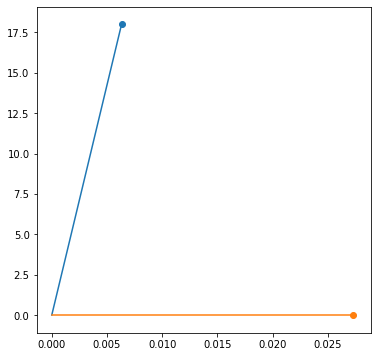

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

ax.plot([0, vec1[0]], [0,vec1[1]])
ax.plot([0,vec2[0]], [0,vec2[1]])

ax.scatter(vec1[0], vec1[1])
ax.scatter(vec2[0], vec2[1])

plt.show()

Из величины скалярного произведения видно, что угол между векторами большой, что проиллюстрировано и графически. На первый взгляд, угол между векторами совсем не похож на почти 90 градусов, но надо обратить внимание на разницу масштабов осей. 

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

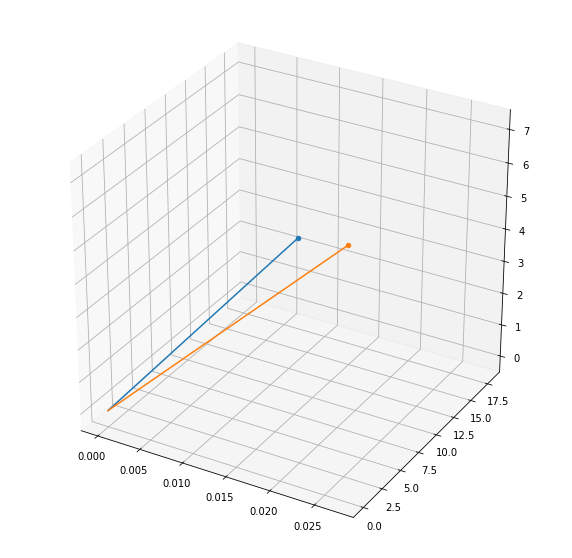

In [65]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

vec1 = np.array([boston.data[0,0], boston.data[0,1], boston.data[0,2]])
vec2 = np.array([boston.data[1,0], boston.data[1,1], boston.data[1,2]])

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot([0, vec1[0]], [0,vec1[1]], [0,vec1[2]])
ax.plot([0, vec2[0]], [0,vec2[1]], [0,vec2[2]])

ax.scatter(vec1[0], vec1[1], vec1[2])
ax.scatter(vec2[0], vec2[1], vec2[2])

plt.show()

Найти косинус угла между векторами x1 и x2, где x1 и x2 - это два дома из 2ух атрибутов, полученных на этапе 2.

Найти расстояние между точками x1 и x2.

In [66]:
# vec1 и vec2 мы брали из первых строк, они были только разной размерности, так что можно не переопределять
# для двумерного расстояния достаточно будет взять первые координаты

dist_2d = ( (vec1[0] - vec2[0]) ** 2 + (vec1[1] - vec2[1]) ** 2 ) ** 0.5
dist_3d = ( (vec1[0] - vec2[0]) ** 2 + (vec1[1] - vec2[1]) ** 2  + (vec1[2] - vec2[2]) ** 2) ** 0.5

print(dist_2d), print(dist_3d)

18.00001223833195
18.618755076000653


(None, None)

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

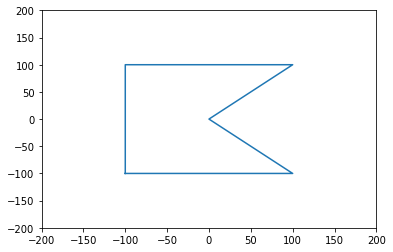

In [67]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Уменьшить объект в два раза.

(-200, 200)

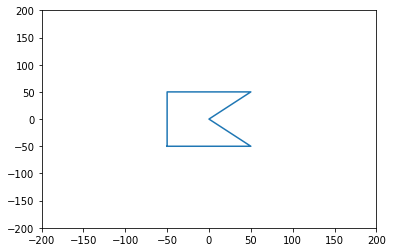

In [71]:
transform = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])

A_new = []

for dot in A:
    new_dot = np.dot(transform, np.transpose(dot))
    A_new.append(new_dot)
A_new = np.array(A_new).astype(int)

x = A_new[:,0]
y = A_new[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Повернуть на 130 градусов.

(-200, 200)

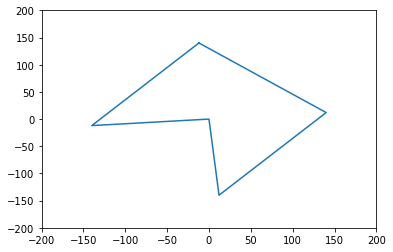

In [76]:
from math import cos, sin, pi

theta = 130 * pi / 180
transform = np.array([[cos(theta), sin(theta), 0], [-sin(theta), cos(theta), 0], [0, 0, 1]])

A_new = []
for dot in A:
    new_dot = np.dot(transform, np.transpose(dot))
    A_new.append(new_dot)
A_new = np.array(A_new).astype(int)

x = A_new[:,0]
y = A_new[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Отразить объект относительно прямой y=x

(-200, 200)

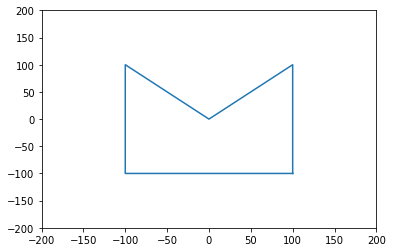

In [79]:
"""Отразить можно с помощью матрицы [[-1, 0, 0], [0, -1, 0], [0, 0, 1]]. 
Прямая у=х проходит через четные квадранты под 45 градусов относительно оси х. 
Отразить относительно ее, это отразить и повернуть на 90 градусов"""

theta = 90 * pi / 180
transform = np.array([[-cos(theta), -sin(theta), 0], [sin(theta), -cos(theta), 0], [0, 0, 1]])

A_new = []

for dot in A:
    new_dot = np.dot(transform, np.transpose(dot))
    A_new.append(new_dot)
A_new = np.array(A_new).astype(int)

x = A_new[:,0]
y = A_new[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

(-500, 500)

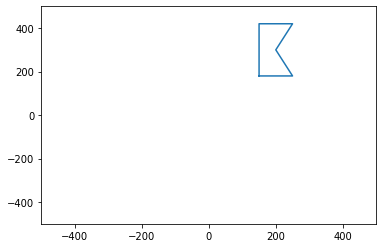

In [81]:
"""В принципе, ничего не мешает обе операции выполнить с помощью одной матрицы, которая и изменит размер и сдвинет"""

transform = np.array([[0.5, 0, 200], [0, 1.2, 300], [0, 0, 1]])

A_new = []

for dot in A:
    new_dot = np.dot(transform, np.transpose(dot))
    A_new.append(new_dot)
A_new = np.array(A_new).astype(int)

x = A_new[:,0]
y = A_new[:,1]
plt.plot(x, y)
plt.ylim([-500, 500])
plt.xlim([-500, 500])